## <div align = "center"> Fall 2020 Data Science Intern Challenge (Shopify) </div>

### Question 1 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


# Import Dataset:
df1 = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')
display(df1.head(10), df1.info())

# Find the Number of Unique Sneakeer Stores:
print("The Number of Different Sneaker Stores is: ", df1['shop_id'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1863,39,738,536,4,cash,2017-03-01 00:08:09.179
1,1742,39,910,268,2,cash,2017-03-01 00:10:19.043
2,3229,97,912,324,2,cash,2017-03-01 00:14:12.250
3,1268,80,798,290,2,credit_card,2017-03-01 00:19:31.258
4,2690,49,799,258,2,credit_card,2017-03-01 00:22:24.790
5,1442,39,723,134,1,debit,2017-03-01 00:26:38.548
6,1116,52,815,584,4,cash,2017-03-01 00:31:04.112
7,3225,22,874,292,2,cash,2017-03-01 00:40:19.231
8,1687,74,901,459,3,credit_card,2017-03-01 00:43:38.531
9,3957,52,745,146,1,debit,2017-03-01 00:44:32.289


None

The Number of Different Sneaker Stores is:  100


### Calculate the AOV / Average of Order Amount:

In [2]:
# Obtain the Average of order values (AOV):
df1["order_amount"].mean()

3145.128

We see that the average order amount is $3145.13, but this is the average cost of the total order amount cost of the total items. Some customers have high order amount since they ordered more than 1 item. Therefore, it will be better to define the cost per shoe in our dataframe to find the cost of each item for each order id placed.

Once we have the cost per shoe for each order placed, then we can find the average cost per shoe for the 5000 orders placed. 

### Find the Order Amount Per-Item

In [3]:
df1['cost_per_item'] = df1['order_amount']/df1['total_items']
df1.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item
0,1863,39,738,536,4,cash,2017-03-01 00:08:09.179,134.0
1,1742,39,910,268,2,cash,2017-03-01 00:10:19.043,134.0
2,3229,97,912,324,2,cash,2017-03-01 00:14:12.250,162.0
3,1268,80,798,290,2,credit_card,2017-03-01 00:19:31.258,145.0
4,2690,49,799,258,2,credit_card,2017-03-01 00:22:24.790,129.0
5,1442,39,723,134,1,debit,2017-03-01 00:26:38.548,134.0
6,1116,52,815,584,4,cash,2017-03-01 00:31:04.112,146.0
7,3225,22,874,292,2,cash,2017-03-01 00:40:19.231,146.0
8,1687,74,901,459,3,credit_card,2017-03-01 00:43:38.531,153.0
9,3957,52,745,146,1,debit,2017-03-01 00:44:32.289,146.0


### Obtain the AOV of Cost-Per-Item:

In [4]:
df1["cost_per_item"].mean()

387.7428

As you can see, now the average cost of each shoe of $387 makes more sense. However, this value might be a little high considering that all the 100 sneaker shops only sell regular shoes. Therefore, it is still a good idea to look at the distribution of the cost of each shoe to identify any outliers.

### Obtain the Distribution of Cost-Per-Item:

Text(0.5, 1.0, 'Histogram of Cost-Per-Item')

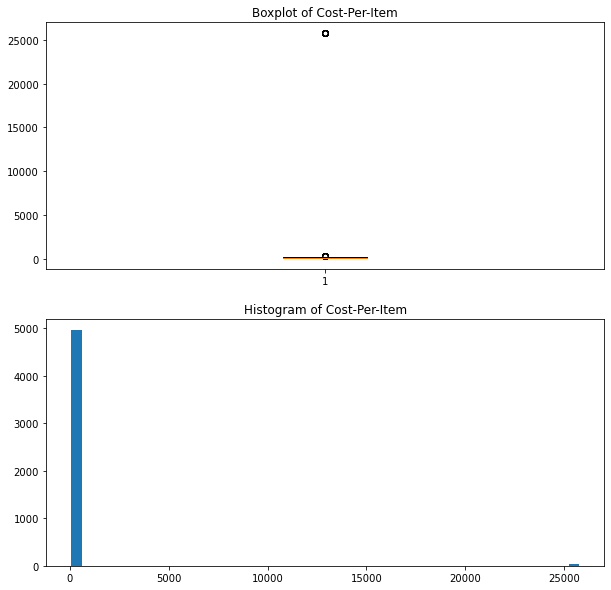

In [5]:
# Obtain the Distribution of Cost-Per-Item:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.boxplot(df1['cost_per_item'])
ax2.hist(df1['cost_per_item'], bins = 50)

ax1.set_title('Boxplot of Cost-Per-Item')
ax2.set_title('Histogram of Cost-Per-Item')



As we can see from the boxplot and histogram that there are outliers for the Cost-Per-Item. We see there are costs of more than 25,000 dollars for a single shoe. This does not make sense and these datapoints are causing the average value per shoe to be on a higher end of 387.74 dollars.

## Solution: Remove the Outliers Via Z-Score Method:


In [6]:
from scipy import stats

# Obtain Respective Z_Scores for the Variable which has the Outliers:
Cost_Per_Item_Zscore = stats.zscore(df1['cost_per_item'])
Cost_Per_Item_Zscore = list(Cost_Per_Item_Zscore)

#---------------------------------------------------------------------------------------------------------

# Create Z-Score columns for Variables that have Outliers:
df1['Cost_Per_Item_Zscore'] = Cost_Per_Item_Zscore

#----------------------------------------------------------------------------------------------------------

# Filter Out the Dataframe when any of the Z-Score columns have Z-values are greater than 3 or smaller than -3:
df1 = df1[((df1['Cost_Per_Item_Zscore'] < 3) & (df1['Cost_Per_Item_Zscore'] > -3))]



### Check Distribution of Cost-Per-Item Again:

Text(0.5, 1.0, 'Histogram of Cost-Per-Item')

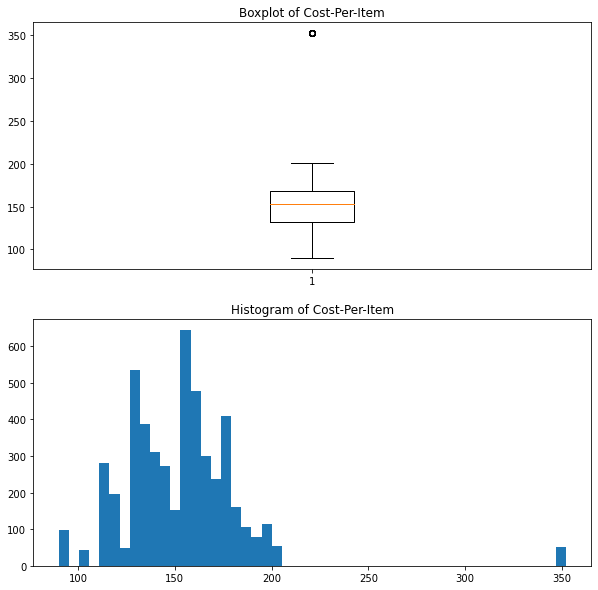

In [7]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.boxplot(df1['cost_per_item'])
ax2.hist(df1['cost_per_item'], bins = 50)

ax1.set_title('Boxplot of Cost-Per-Item')
ax2.set_title('Histogram of Cost-Per-Item')

Now, the distribution of the cost per shoe makes much more sense after data cleaning of outliers. However, there is still an outlier of 350 dollars after cleaning and I decide to remove this as well. 

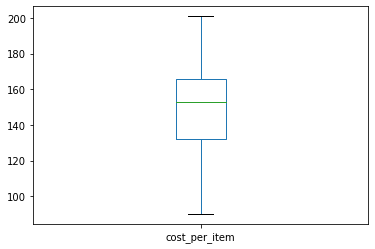

In [8]:
# Remove the $350 Outlier:
df1 = df1[(df1['cost_per_item'] < 350)]

df1['cost_per_item'].plot(kind = 'box')

### With the cleaned dataset, I can now report the AOV of the Order Amount

In [9]:
df1['order_amount'].mean()

300.1558229655313

Now this AOV Order Amount of 300 dollars makes much more sense compared to our starting value fo 3145.13 dollars. Given that the sneaker shops sell a relatively affordable item, this new AOV value makes sense for order purchase. However, for this dataset, it would be better to report the average revenue / cost per shoe sold. This is because we can have various customers buying different number of shoes. If the number of customers / orders are few and the number of purchases per order is huge (Eg; 4-5), then the AOV of the Order Amount will be huge. It is better to use the average cost per shoe as the metric for this dataset. 

### Average Cost Per Shoe  / Item

In [10]:
df1['cost_per_item'].mean()

150.40016316540894

The average revenue per shoe sold is 150 dollars. This makes sense as the sneaker shops are selling only regular shoes. 